<a href="https://colab.research.google.com/github/DaanaGtz/Estadistica/blob/main/eii_u2_ep_22150551.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TECNOLOGICO NACIONAL DE MEXICO**

**INSTITUTO TECNOLOGICO DE AGUSCALIENTES**

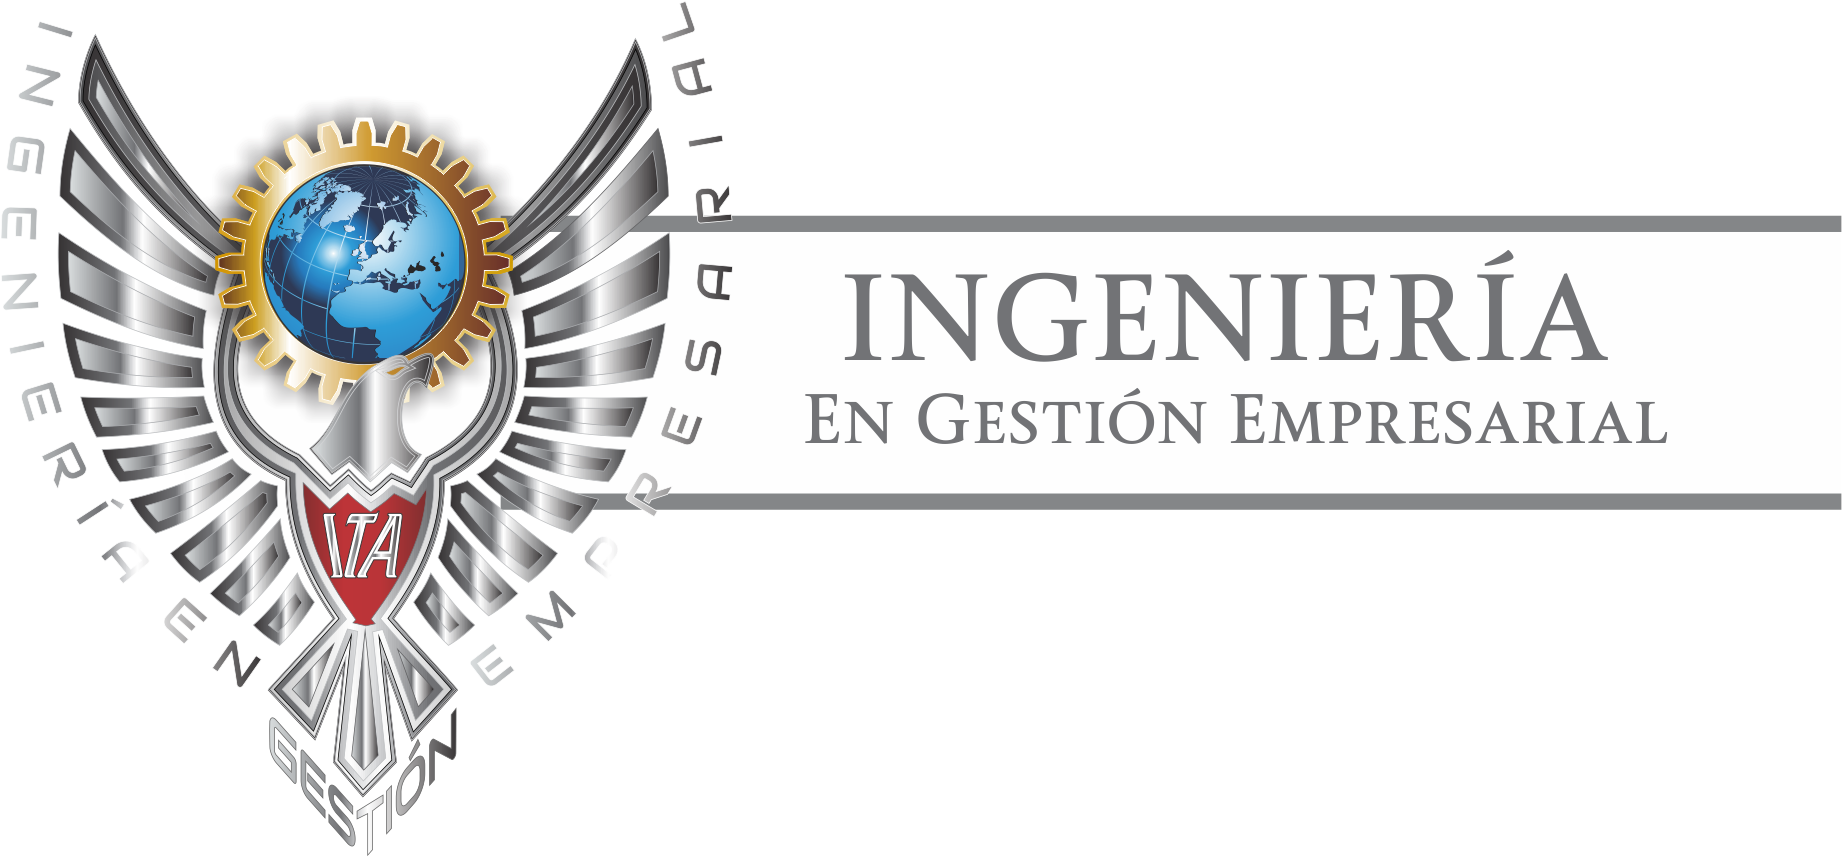

**INGENIERIA EN GESTION EMPRESARIAL**

**ESTADISTICA INFERENCIAL II**

**EXAMEN U2**

**ALIUMNA: DAANA PAOLA GUTIERREZ GARCIA**

**DOCENTE: JOSE CRUZ MUÑOZ ESPARZA**

# **INTRODUCCION**

Al analizar estas gráficas de manera detallada nos ayuda a ver si hay problemas con la forma en que ajustamos los datos. Por ejemplo, podríamos ver si las relaciones entre las cosas no son líneas rectas como pensábamos, si los errores varían mucho en lugar de ser más o menos constantes, o si los errores no siguen un patrón normal.
Encontrar estos fallos es muy importante porque pueden cambiar cómo entendemos los números que obtuvimos, si nuestras pruebas son válidas y qué tan bien podemos predecir cosas en el futuro. Por eso, revisar bien los errores que quedaron después de ajustar los datos es un paso que no podemos saltarnos cuando hacemos modelos de regresión."

# **a) Datos Inservibles**


In [ ]:
import pandas as pd
import numpy as np

df =pd.read_csv('https://raw.githubusercontent.com/DaanaGtz/Estadistica/refs/heads/main/Hipertension_Arterial_Mexico%20(3).csv')

df.dropna(inplace = True)
df

,FOLIO_I,sexo,edad,concentracion_hemoglobina,temperatura_ambiente,valor_acido_urico,valor_albumina,valor_colesterol_hdl,valor_colesterol_ldl,valor_colesterol_total,...,segundamedicion_peso,segundamedicion_estatura,distancia_rodilla_talon,circunferencia_de_la_pantorrilla,segundamedicion_cintura,tension_arterial,sueno_horas,masa_corporal,actividad_total,riesgo_hipertension
0,2022_01001004,2,41,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,107,4,32.889389,120,1
1,2022_01001009,2,65,14.1,9,4.4,3.8,73,130.0,252,...,96.75,152.2,44.5,41.1,113.7,104,2,1.000000,240,0
2,2022_01001012,2,68,14.2,22,4.8,4.0,34,86.0,139,...,68.70,144.8,42.3,37.8,103.7,105,1,1.000000,480,0
3,2022_01001013,1,35,15.7,11,6.5,4.1,49,107.0,203,...,64.70,154.0,48.5,33.5,0.0,117,5,26.265339,275,1
4,2022_01001015,2,65,12.7,7,4.2,4.2,41,76.0,145,...,97.15,161.3,49.6,42.0,118.9,123,2,1.000000,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4358,2022_32056019,2,62,14.2,22,4.8,4.0,34,86.0,139,...,64.25,160.5,51.1,34.5,77.8,125,4,1.000000,280,0
4359,2022_32056024,1,39,14.2,22,4.8,4.0,34,86.0,139,...,64.70,154.0,48.5,33.5,0.0,130,4,19.193721,780,0
4360,2022_32056026,2,69,15.9,11,2.9,1.9,21,44.0,74,...,71.20,148.6,47.2,38.0,0.0,147,4,1.000000,300,0
4361,2022_32056029,1,67,17.6,14,5.5,4.0,44,96.0,171,...,68.20,167.7,51.5,36.5,96.4,108,2,1.000000,240,0


# **b) Mapa de Calor**

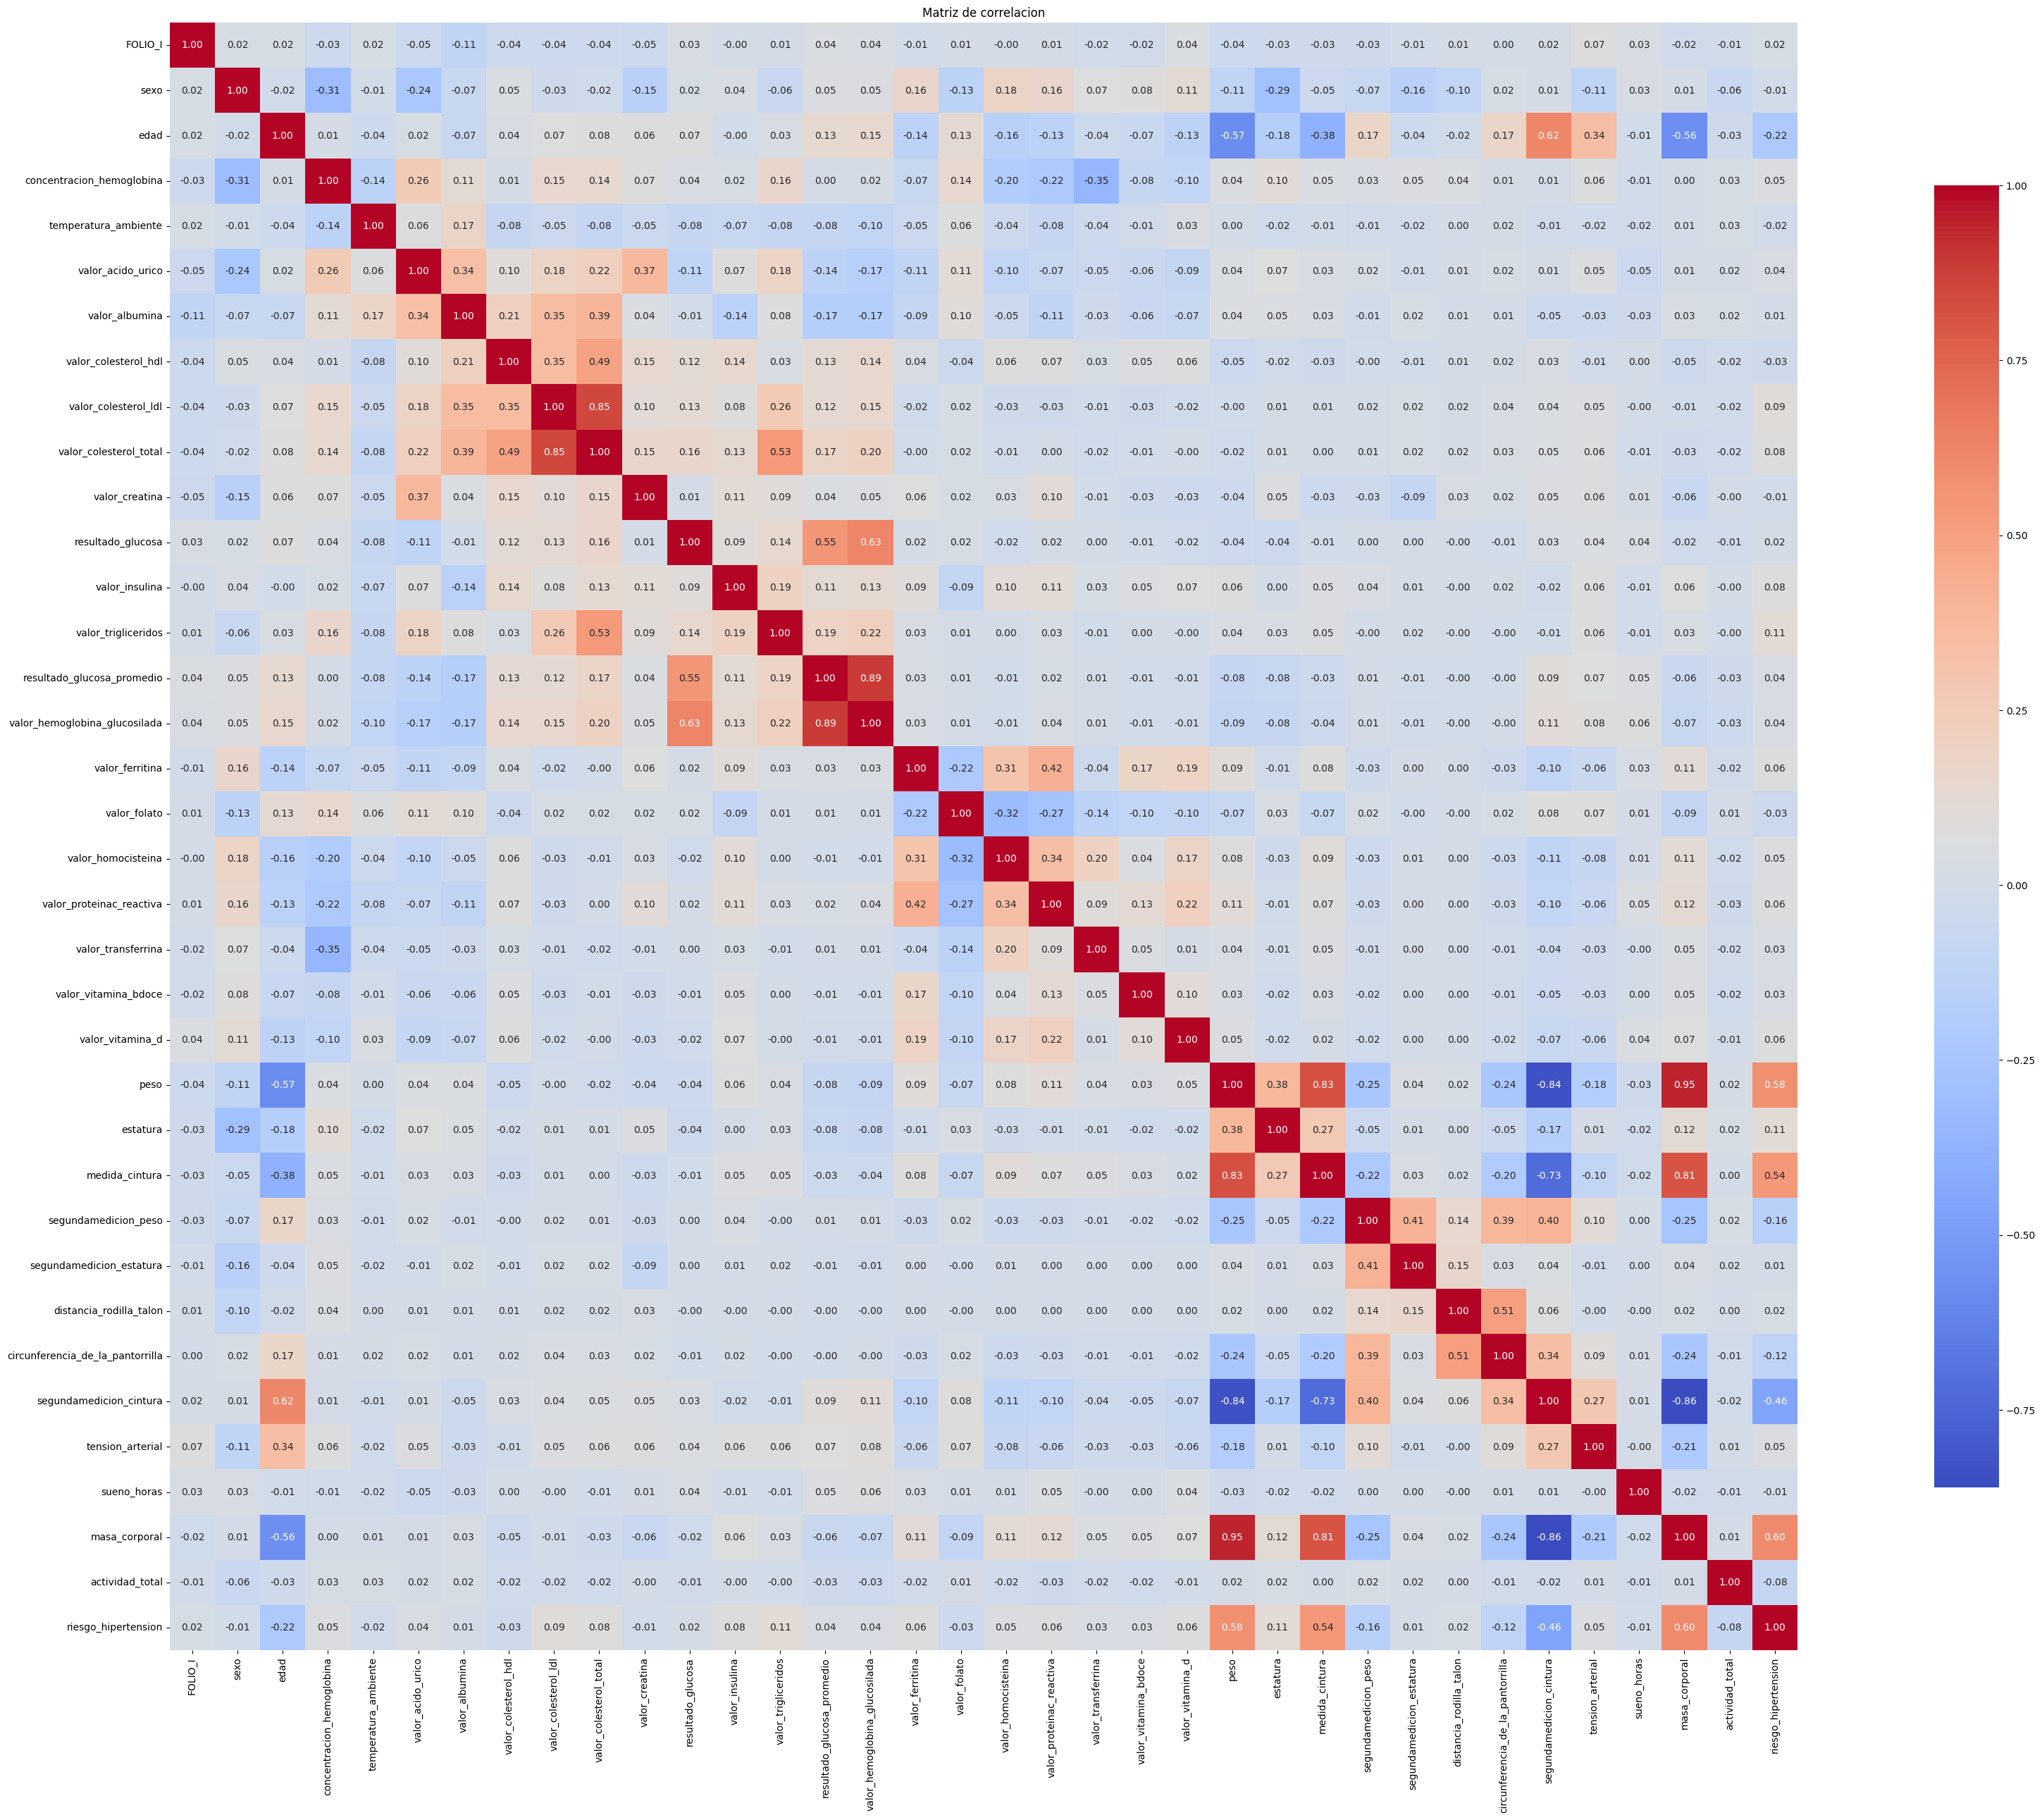

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

matriz_de_correlacion = df.corr()
plt.figure(figsize =(50, 30))
sns.heatmap(matriz_de_correlacion, annot = True, cmap = 'coolwarm', fmt = ".2f", square = True, cbar_kws = {"shrink": 0.8})
plt.title('Matriz de correlacion')
plt.show()

Coeficiente de correlacion:  0.1072



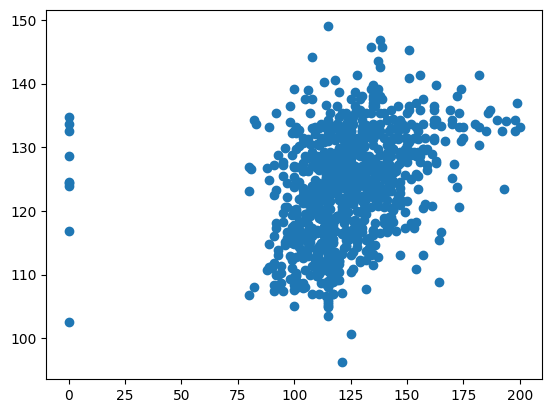

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt


X = df[['edad',	'sexo',	'peso',	'estatura']]
Y = df["tension_arterial"]

# Datos de entrenamiento y datos de prueba

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

X_train_constante = sm.add_constant(X_train)
X_test_constante = sm.add_constant(X_test)

modelo = sm.OLS(Y_train, X_train_constante).fit()


Yc = modelo.predict(X_test_constante)

plt.scatter(Y_test, Yc)

r2 = r2_score(Y_test, Yc)
print(f'Coeficiente de correlacion: {r2: 0.4f}\n')

# **c) Hipotesis**

Tomar bebidas con mucho azúcar seguido, moverse poco y tener familiares con obesidad está relacionado con tener un peso más alto .Osea que puede haber probabilidad de tener tambien obesidad.

# **d) Regresión Ajustada**

In [ ]:
import pandas as pd
import statsmodels.api as sm

variable_dependiente = df['tension_arterial']
variables_independientes = df[['edad',	'sexo',	'peso',	'estatura']]

variables_independientes = sm.add_constant(variables_independientes)

modelo = sm.OLS(variable_dependiente, variables_independientes)
resultados = modelo.fit()

print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:       tension_arterial   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          2.15e-132
Time:                        00:50:26   Log-Likelihood:                -19486.
No. Observations:                4363   AIC:                         3.898e+04
Df Residuals:                    4358   BIC:                         3.901e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         95.3477      4.408     21.629      0.0

# **e) Coeficiente de Determinación**

In [ ]:
import pandas as pd
import statsmodels.api as sm


variable_dependiente = df['tension_arterial']
variables_independientes = df[['edad',	'sexo',	'peso',	'estatura']]


variables_independientes = sm.add_constant(variables_independientes)

modelo = sm.OLS(variable_dependiente, variables_independientes)
resultados = modelo.fit()

r_cuadrado = resultados.rsquared

print(f"El coeficiente de determinación (R-cuadrado) es: {r_cuadrado}")

print(resultados.summary())

El coeficiente de determinación (R-cuadrado) es: 0.13214862228394375
                            OLS Regression Results                            
Dep. Variable:       tension_arterial   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     165.9
Date:                Sun, 13 Apr 2025   Prob (F-statistic):          2.15e-132
Time:                        00:20:33   Log-Likelihood:                -19486.
No. Observations:                4363   AIC:                         3.898e+04
Df Residuals:                    4358   BIC:                         3.901e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

La herramienta de regresión lineal da cuenta de cerca del 13.2% de la variación en la presión sanguínea (R-cuadrado = 0.132). La herramienta completa muestra relevancia estadística (Prob(F-statistic) < 0.001). La edad, el género y la altura son factores predictivos relevantes, pero el peso no lo es en esta herramienta. Asimismo, se encontraron detalles problemáticos en cómo se dispersaron los errores y una potencial correlación alta entre las variables, lo cual implica que se debe ser cauteloso con las interpretaciones y pensar en otros análisis o herramientas

# **f) Linealidad, Normalidad y Homoscedasticidad**

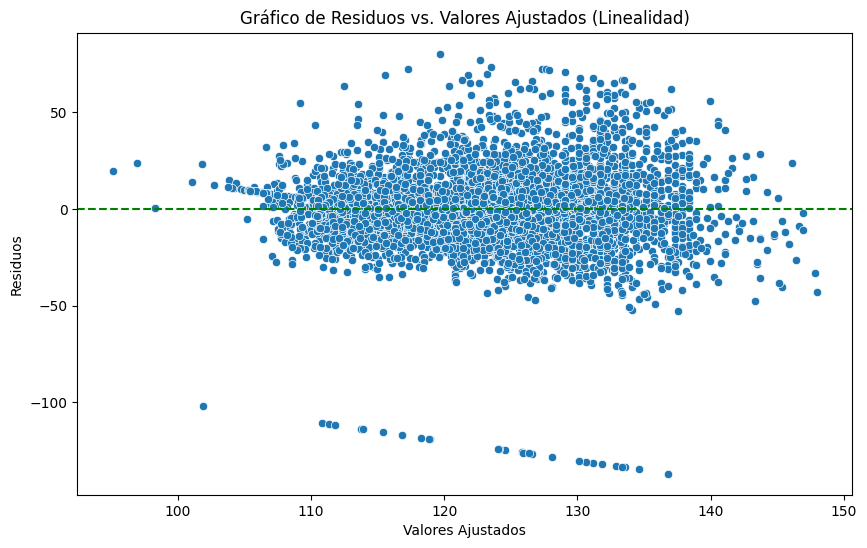

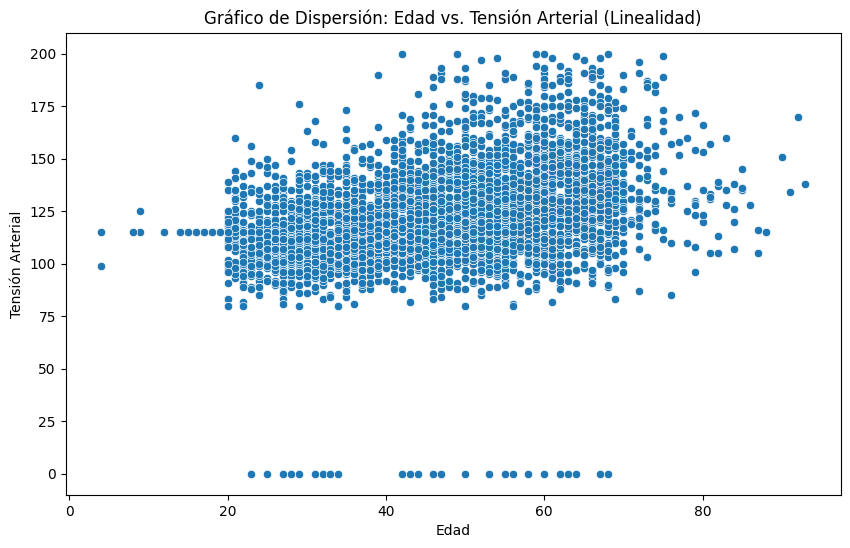

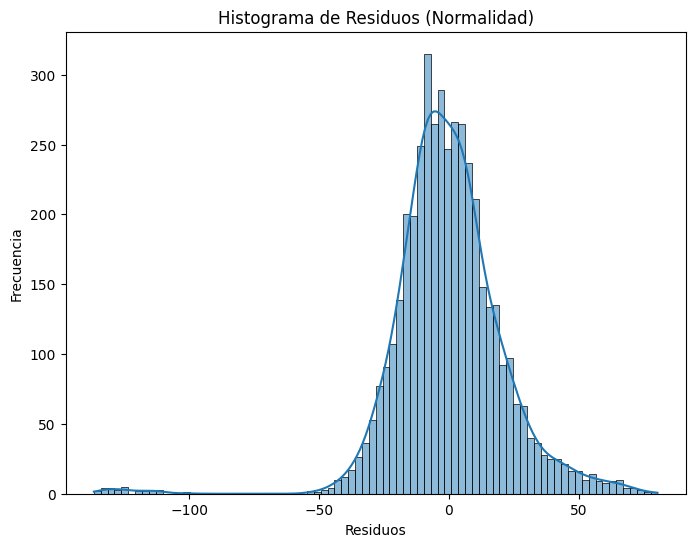

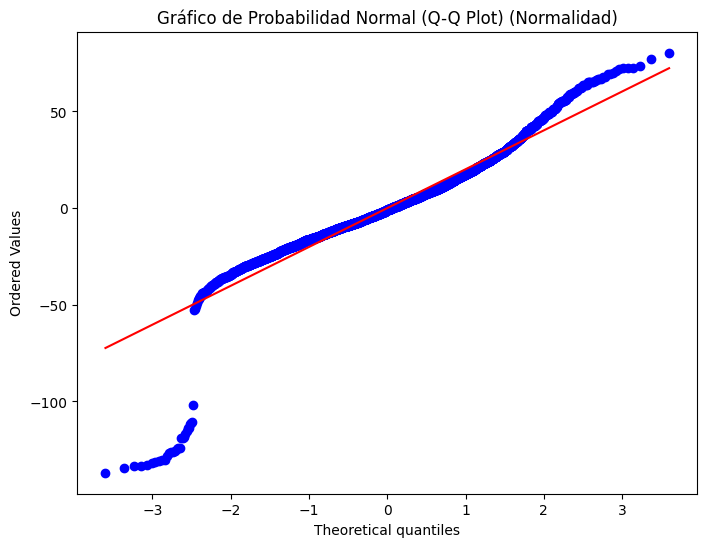


Prueba de Shapiro-Wilk: Estadístico = 0.909, p-valor = 0.000


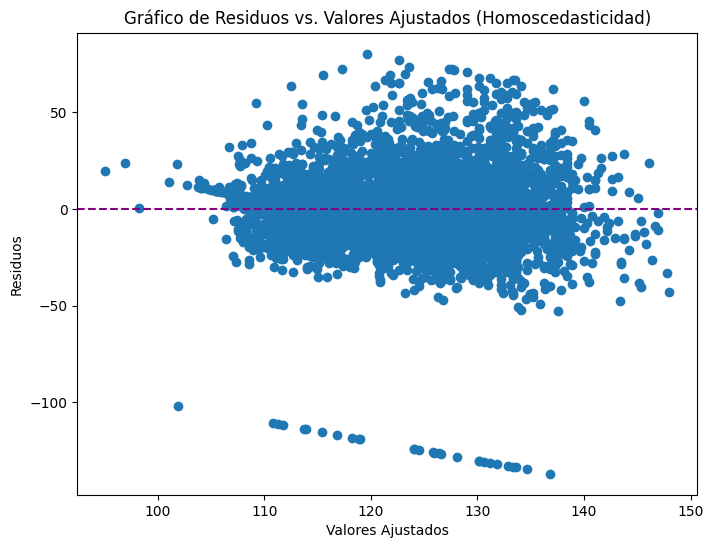

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

variable_dependiente = df['tension_arterial']
variables_independientes = df[['edad',	'sexo',	'peso',	'estatura']]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=resultados.fittedvalues, y=resultados.resid)
plt.axhline(0, color='green', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs. Valores Ajustados (Linealidad)")
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['edad'], y=df['tension_arterial'])
plt.xlabel("Edad")
plt.ylabel("Tensión Arterial")
plt.title("Gráfico de Dispersión: Edad vs. Tensión Arterial (Linealidad)")
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(resultados.resid, kde=True)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos (Normalidad)")
plt.show()


plt.figure(figsize=(8, 6))
stats.probplot(resultados.resid, dist="norm", plot=plt)
plt.title("Gráfico de Probabilidad Normal (Q-Q Plot) (Normalidad)")
plt.show()

shapiro_test = stats.shapiro(resultados.resid)
print(f"\nPrueba de Shapiro-Wilk: Estadístico = {shapiro_test.statistic:.3f}, p-valor = {shapiro_test.pvalue:.3f}")

plt.figure(figsize=(8, 6))
plt.scatter(resultados.fittedvalues, resultados.resid)
plt.axhline(0, color='purple', linestyle='--')
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt
plt.title("Gráfico de Residuos vs. Valores Ajustados (Homoscedasticidad)")
plt.show()


# **g) Conclusión**

El estudio de los residuos revela que el modelo exhibe diversas dificultades en la satisfacción de los supuestos fundamentales de los modelos de regresión lineal.

Linealidad: Si bien el primer diagrama de residuos versus valores predichos no evidenció una infracción considerable de la linealidad, el diagrama de dispersión inicial entre las variables en la edad frente a Presión Sanguínea, sugería una conexión posiblemente no lineal. Esto podría estar influyendo en los inconvenientes detectados en los residuos.

Homocedasticidad: El segundo gráfico de residuos contra valores ajustados se a identificado para homocedasticidad ilustra una dispersión de los residuos que aparenta ser relativamente uniforme, lo que implica que la asunción de homocedasticidad podría satisfacerse de forma aceptable.

Normalidad: Tanto el histograma de residuos como el gráfico de probabilidad normal (Q-Q plot) señalan una divergencia notable de la normalidad en la distribución de los residuos. Se aprecia asimetría positiva, colas anchas y la potencial existencia de valores extremos, especialmente en la cola inferior.

Aunque la homocedasticidad quizás no represente un problema grave, la posible no linealidad en la relación entre las variables y, de forma más evidente, la ausencia de normalidad en la distribución de los residuos constituyen inquietudes relevantes. Estas inobservancias de los supuestos pueden impactar la confiabilidad de las pruebas de hipótesis, los intervalos de confianza y las predicciones generadas por el modelo.